# Project: Wrangling and Analyze Data

<h2>import libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import requests as rq
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_df=pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
img_data=rq.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

<h4>Save image predictions into tsv</h4>

In [4]:
img_text=img_data.text
text_lines=img_text.split("\n")
img_df_init=pd.concat([pd.DataFrame(x.split("\t")).T for x in text_lines])
img_df_init.to_csv("image_predictions.tsv",sep="\t",index=False)

In [5]:
img_df=pd.read_csv("image_predictions.tsv",sep="\t",header=1)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = twitter_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('ignore_tweet_json_.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        break
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
0.11753534299896273
{892420643555336193: TweepError([{'code': 215, 'message': 'Bad Authentication data.'}],)}


<h4>Read tweet_json.txt</h4>

In [7]:
json_dict={"line_index":[],"tweet_id":[],"retweet_count":[],"fav_count":[]}
with open("tweet_json.txt","r") as f:
    for line_index,line in enumerate(f):
        json_obj=json.loads(line)
        json_dict["line_index"].append(line_index)
        json_dict["tweet_id"].append(json_obj["id"])
        json_dict["retweet_count"].append(json_obj["retweet_count"])
        json_dict["fav_count"].append(json_obj["favorite_count"])

In [8]:
json_df=pd.DataFrame(json_dict)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



<h4>Visual assessment</h4>

In [9]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
img_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,6.660209e+17,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,6.660293e+17,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,6.660334e+17,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,6.660442e+17,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,6.660492e+17,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,6.660508e+17,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1.0,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,6.660519e+17,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1.0,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,6.660555e+17,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1.0,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,6.660571e+17,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1.0,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,6.660586e+17,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1.0,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
json_df

,line_index,tweet_id,retweet_count,fav_count
0,0,892420643555336193,8853,39467
1,1,892177421306343426,6514,33819
2,2,891815181378084864,4328,25461
3,3,891689557279858688,8964,42908
4,4,891327558926688256,9774,41048
5,5,891087950875897856,3261,20562
6,6,890971913173991426,2158,12041
7,7,890729181411237888,16716,56848
8,8,890609185150312448,4429,28226
9,9,890240255349198849,7711,32467


<h4>Programmatic assessment</h4>

In [12]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 12 columns):
tweet_id    2075 non-null float64
jpg_url     2075 non-null object
img_num     2075 non-null float64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null object
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null object
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null object
dtypes: float64(5), object(7)
memory usage: 194.7+ KB


In [15]:
img_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
line_index       2354 non-null int64
tweet_id         2354 non-null int64
retweet_count    2354 non-null int64
fav_count        2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [17]:
json_df.describe()

,line_index,tweet_id,retweet_count,fav_count
count,2354.000000,2.354000e+03,2354.000000,2354.000000
mean,1176.500000,7.426978e+17,3164.797366,8080.968564
std,679.685589,6.852812e+16,5284.770364,11814.771334
min,0.000000,6.660209e+17,0.000000,0.000000
25%,588.250000,6.783975e+17,624.500000,1415.000000
50%,1176.500000,7.194596e+17,1473.500000,3603.500000
75%,1764.750000,7.993058e+17,3652.000000,10122.250000
max,2353.000000,8.924206e+17,79515.000000,132810.000000


In [18]:
twitter_df[twitter_df["text"].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [19]:
twitter_df[twitter_df["tweet_id"].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [20]:
img_df[img_df["tweet_id"].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [21]:
json_df[json_df["tweet_id"].duplicated()]

,line_index,tweet_id,retweet_count,fav_count


In [22]:
json_df

,line_index,tweet_id,retweet_count,fav_count
0,0,892420643555336193,8853,39467
1,1,892177421306343426,6514,33819
2,2,891815181378084864,4328,25461
3,3,891689557279858688,8964,42908
4,4,891327558926688256,9774,41048
5,5,891087950875897856,3261,20562
6,6,890971913173991426,2158,12041
7,7,890729181411237888,16716,56848
8,8,890609185150312448,4429,28226
9,9,890240255349198849,7711,32467


In [23]:
img_df[img_df["tweet_id"].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Quality issues
1. twitter_df : Some dog names in name column with invalid names like "a","an","the".This is because the first sentence of text column is not uniform and the third word is not always the name of the dog.

2.  twitter_df : timestamp  is an object datatype instead of datetime datatype

3. twitter_df : Erroneous denominator rating characterised by high max value(170) and "0" as minimum values from describe() method. The correct value is 10 as explained earlier.

4. twitter_df: Possible erroneous numerator values characterised by high max values(1776) which is far from the 75th percentile value of 12.This can impact mean values of the numerator rating.

5. img_df: p1_dog ,p2_dog and p3_dog have wrong datatypes(object) instead of bool_ datatype

6.  img_df :  tweet_id  column has some null values

7. img_df : tweet_id is a float64 datatype  instead of an int datatype

8.  json_df : Missing records (2354) instead of (2356)




### Tidiness issues
1.  twitter_df :  Multiple columns for dog stage name e.g doggo,floofer,pupper,puppo.

2. twitter df and json_df should form one observational unit by merging on tweet_id

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
# Make copies of original pieces of data
twitter_df_clean=twitter_df.copy()
img_df_clean=img_df.copy()
json_df_clean=json_df.copy()

<h3>Quality issues</h3>

#### Issue #1:   Some dog names in name column with invalid names like "a","an","the".This is because the first sentence of text column is not uniform and the third word is not always the name of the dog

#### Define:  Replace invalid dog names with appropriate dog names from text_colunm using string search and string splicing methods

#### Code

In [25]:
#get count of each dog name..see how frequent invald dog names like None,a,an,the exist
twitter_df_clean["name"].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
Sadie           8
the             8
Toby            7
an              7
Buddy           7
Bailey          7
Daisy           7
Koda            6
Dave            6
Stanley         6
Milo            6
Oscar           6
Jax             6
Bella           6
Scout           6
Jack            6
Leo             6
Rusty           6
Gus             5
             ... 
Mutt            1
Maya            1
Milky           1
Napolean        1
Amy             1
Gabby           1
Duddles         1
Clarq           1
Cermet          1
Mollie          1
Cal             1
Stefan          1
Randall         1
Rey             1
Amélie          1
Batdog          1
Dietrich        1
Alf             1
Kendall         1
Kayla           1
Emma            1
Noah            1
incredibly      1
Ralphson        1
Tilly     

In [26]:
#extract a df with the invalid dog names
invalid_dog_name_df=twitter_df_clean[twitter_df_clean["name"].isin(["None","a","an","the"])]
#extract first sentence of text column by split method
invalid_dog_name_df["first_sentence"]=invalid_dog_name_df["text"].str.split(".",n=1,expand=True).loc[:,0]
#get where first sentence is "This is (a|an|the)"..This is meant to handle the invalid dog names like a,an,the..None dog name will be dropped
invalid_dog_name_df["valid_first_sentence"]=invalid_dog_name_df["first_sentence"].str.extract(r"\bThis\b is (an|a|the)",expand=True)
#get dataframe where valid_first_sentence is not null and extract the 3rd to 4th word.That is the dog name
mini_dog_name_df=invalid_dog_name_df[invalid_dog_name_df["valid_first_sentence"].notnull()]["first_sentence"].str.split(" ",expand=True).loc[:,3:4]

In [27]:
#get dataframe where valid_first_sentence is not null and extract the 3rd to 4th word.That is the dog name
invalid_dog_name_df[invalid_dog_name_df["valid_first_sentence"].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,first_sentence,valid_first_sentence
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None,RT @dog_rates: This is an East African Chalupa...,an
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None,This is a mighty rare blue-tailed hammer sherk,a
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None,This is a carrot,a
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None,This is an Iraqi Speed Kangaroo,an
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None,This is a very rare Great Alaskan Bush Pupper,a
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None,This is a taco,a
1361,703079050210877440,NaN,NaN,2016-02-26 04:48:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Butternut Cumberfloof. It's not wind...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703079050...,11,10,a,None,None,None,None,This is a Butternut Cumberfloof,a
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None,This is an East African Chalupa Seal,an
1368,702539513671897089,NaN,NaN,2016-02-24 17:04:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Wild Tuscan Poofwiggle. Careful not ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702539513...,12,10,a,None,None,None,None,This is a Wild Tuscan Poofwiggle,a
1499,692187005137076224,NaN,NaN,2016-01-27 03:26:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a rare Arctic Wubberfloof. Unamused by...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692187005...,12,10,a,None,None,None,None,This is a rare Arctic Wubberfloof,a


In [28]:
#3rd and 4th word of sentence extracted but some invalid dog names still exist like "rare","a","an","the","is","mighty","happiest","picture"
#create another dataframe(clean_dog_name) that excludes this invalid dog names
clean_dog_name=mini_dog_name_df[~mini_dog_name_df.isin(["rare","a","an","the","is","mighty","happiest","picture","odd",None]).any(axis=1)]

In [29]:
#combine column 3 and 4 to create a single dog name
clean_dog_name["full_dog_name"]=clean_dog_name[3]+" "+clean_dog_name[4]

In [30]:
#update twitter_df with new dog names from clean_dog_name dataframe
twitter_df_clean.loc[twitter_df_clean.index.isin(clean_dog_name.index),["name"]]=clean_dog_name["full_dog_name"].values

In [31]:
#confirm if invalid 
twitter_df_clean["name"].value_counts()

None              745
a                  22
Charlie            12
Cooper             11
Oliver             11
Lucy               11
Penny              10
Tucker             10
Lola               10
Bo                  9
Winston             9
Sadie               8
Buddy               7
Bailey              7
Daisy               7
Toby                7
the                 6
Jack                6
Dave                6
Bella               6
Leo                 6
Koda                6
Milo                6
Jax                 6
Stanley             6
Scout               6
Rusty               6
Oscar               6
very                5
Louis               5
                 ... 
Cilantro            1
Nico                1
Nigel               1
Genevieve           1
Socks               1
Corey               1
Goose               1
Tom                 1
Bayley              1
wild Toblerone      1
Butters             1
Nugget              1
Pupcasso            1
Mauve               1
Rinna     

<h5>Reduction in the number  "a" and "an" dog names. The remaining invalid dog names is a result of variance in structure  of first sentence of text</h5>

In [32]:
#Handling the remaining "a","an" and "the" invalid dog names by dropping them
twitter_df_clean=twitter_df_clean[(twitter_df_clean["name"]!="a")]

#### Test

In [33]:
twitter_df_clean["name"].value_counts()

None             745
Charlie           12
Lucy              11
Cooper            11
Oliver            11
Tucker            10
Penny             10
Lola              10
Bo                 9
Winston            9
Sadie              8
Buddy              7
Toby               7
Bailey             7
Daisy              7
Scout              6
Dave               6
Milo               6
Oscar              6
the                6
Bella              6
Stanley            6
Jack               6
Jax                6
Leo                6
Koda               6
Rusty              6
Gus                5
Oakley             5
very               5
                ... 
Stormy             1
Tino               1
Brandy             1
Mutt               1
Rodman             1
Daniel             1
Philippe           1
Covach             1
Aubie              1
Burt               1
Aqua               1
Clarq              1
Mollie             1
Cal                1
Stefan             1
Randall            1
Rey          

<h4> Issue #2: twitter_df : timestamp is an object datatype instead of datetime datatype</h4>

#### Define : Convert from object datatype to datetime

#### Code

In [34]:
twitter_df_clean["timestamp"]=pd.to_datetime(twitter_df_clean["timestamp"])

#### Test

In [35]:
twitter_df_clean[["timestamp"]].info()
#convertion successful

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2334 entries, 0 to 2355
Data columns (total 1 columns):
timestamp    2334 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 36.5 KB


<h4>Issue #3 :twitter_df : Erroneous denominator rating characterised by high max value(170) and "0" as minimum values from describe() method. The correct value is 10 as explained earlier.</h4>

<h4>Define : remove non-10 denominator rating since we know the true value is 10</h4>

<h4>Code</h4>

In [36]:
twitter_df_clean=twitter_df_clean[twitter_df_clean["rating_denominator"]==10]

<h4>Test</h4>

In [37]:
twitter_df_clean["rating_denominator"].value_counts()
#only denominator ratings of 10 remaining

10    2312
Name: rating_denominator, dtype: int64

<h4> Issue #4: twitter_df: Possible erroneous numerator rating values characterised by high max values(1776) which is far from the 75th percentile value of 12.</h4>

<h4>Define :Compare the max values with 99 percentile value and drop values above 99 percentile value </h4> 

<h4>Code</h4>

In [38]:
limit_rating_value=twitter_df_clean["rating_numerator"].quantile(0.99)
twitter_df_clean=twitter_df_clean[twitter_df_clean["rating_numerator"]<limit_rating_value]

<h4>Test</h4>

In [39]:
#Extreme max values dropped
twitter_df_clean[["rating_numerator"]].describe()

,rating_numerator
count,2247.000000
mean,10.633289
std,2.132084
min,0.000000
25%,10.000000
50%,11.000000
75%,12.000000
max,13.000000


<h4>Issue #5 :img_df: p1_dog ,p2_dog and p3_dog have wrong datatypes(object) instead of bool_ datatype.</h4>

<h4>Define : Convert to bool_ datatype</h4>

<h4>Code</h4>

In [40]:
img_df_clean[["p1_dog","p2_dog","p3_dog"]]=img_df_clean[["p1_dog","p2_dog","p3_dog"]].astype(bool)

<h4>Test</h4>

In [41]:
img_df_clean[["p1_dog","p2_dog","p3_dog"]].info()
#convertion successful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 3 columns):
p1_dog    2076 non-null bool
p2_dog    2076 non-null bool
p3_dog    2076 non-null bool
dtypes: bool(3)
memory usage: 6.2 KB


<h4>Issue 6#: img_df : tweet_id has some null values</h4>

<h4>Define : Drop null values</h4>

<h4>Code</h4>

In [42]:
img_df_clean.dropna(subset=["tweet_id"],inplace=True)

<h4>Test</h4>

In [43]:
img_df_clean[img_df_clean["tweet_id"].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


<h4>Issue #7 :img_df :tweet_id is a float64 datatype  instead of an int datatype </h4>

<h4>Define : Convert to int datatype</h4>

<h4>Code</h4>

In [44]:
img_df_clean["tweet_id"]=img_df_clean["tweet_id"].astype(int)

<h4>Test</h4>

In [45]:
img_df_clean[["tweet_id"]].dtypes

tweet_id    int64
dtype: object

<h4>Issue #8 :  json_df : Missing records (2354) instead of (2356) </h4>

<h4>Define : For this issue,we make sure that json_df and twitter_df have the same tweet_ids and hence same number of records for easy analysis</h4>

In [46]:
json_df_clean=json_df_clean[json_df_clean["tweet_id"].isin(twitter_df_clean["tweet_id"])]
twitter_df_clean=twitter_df_clean[twitter_df_clean["tweet_id"].isin(json_df_clean["tweet_id"])]

<h4>Test</h4>

In [47]:
print(len(set(json_df_clean["tweet_id"].values).intersection(twitter_df_clean["tweet_id"].values)))
print(len(set(json_df_clean["tweet_id"].values).difference(twitter_df_clean["tweet_id"].values)))

2245
0


<h3>Tidiness issues</h3>

<h4>Issue #1 : twitter_df :  Multiple columns for dog stage name e.g doggo,floofer,pupper,puppo</h4>

<h4>Define : Create a single colummn called Dog_stage and populate it with the corresponding dog_stage name by using
    non_null values from the other 4 columns of dog_stage name.Drop the other columns thereafter</h4>

<h4>Code</h4>

In [48]:
twitter_df_clean.loc[twitter_df_clean[twitter_df_clean["doggo"]!="None"].index,"Dog_stage"]="doggo"
twitter_df_clean.loc[twitter_df_clean[twitter_df_clean["floofer"]!="None"].index,"Dog_stage"]="floofer"
twitter_df_clean.loc[twitter_df_clean[twitter_df_clean["pupper"]!="None"].index,"Dog_stage"]="pupper"
twitter_df_clean.loc[twitter_df_clean[twitter_df_clean["puppo"]!="None"].index,"Dog_stage"]="puppo"

<h4>Test</h4>

In [49]:
# Dog_stage is assigned correctly in this case
twitter_df_clean[~twitter_df_clean["Dog_stage"].isnull()].iloc[:,-5:].sample(5)

,doggo,floofer,pupper,puppo,Dog_stage
992,doggo,None,None,None,doggo
1204,doggo,None,None,None,doggo
1806,None,None,pupper,None,pupper
1122,None,None,pupper,None,pupper
981,None,None,pupper,None,pupper


In [50]:
twitter_df_clean[["Dog_stage"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2245 entries, 0 to 2355
Data columns (total 1 columns):
Dog_stage    356 non-null object
dtypes: object(1)
memory usage: 115.1+ KB


In [51]:
#Drop the earlier columns
try:
    twitter_df_clean.drop(columns=["doggo"],inplace=True)
    twitter_df_clean.drop(columns=["floofer"],inplace=True)
    twitter_df_clean.drop(columns=["pupper"],inplace=True)
    twitter_df_clean.drop(columns=["puppo"],inplace=True)
except:
    pass

<h4>Issue 2#: twitter df and json_df should form one observational unit by merging on tweet_id </h4>

<h4>Merge the two dataframes on tweet_id</h4>

<h4>Code</h4>

In [52]:
#merge twitter_df_clean and json_df and drop line_index column
twitter_df_clean=pd.merge(twitter_df_clean,json_df.iloc[:,1:],on=["tweet_id"],how="left")

<h4>Test</h4>

In [53]:
twitter_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,Dog_stage,retweet_count,fav_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,41048
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,3261,20562
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,2158,12041
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,16716,56848
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,4429,28226
9,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,NaN,7624,31166


In [54]:
twitter_df_clean_2=twitter_df_clean[["tweet_id","timestamp","text"
                                     ,"expanded_urls","rating_numerator",
                                     "rating_denominator","name","Dog_stage","retweet_count","fav_count"]]

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [55]:
twitter_df_clean_2.to_csv("twitter_archive_master.csv")

In [56]:
img_df_clean.to_csv("dog_image_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

<h4>What is the most favorite dog_stage based on the favourite tweet count</h4>

In [57]:
twitter_df_clean_2["month_year"]=twitter_df_clean_2["timestamp"].dt.to_period('M');

In [58]:
twitter_df_clean_2=pd.merge(twitter_df_clean_2,img_df_clean[["tweet_id","p1","p1_conf"]],on="tweet_id",how="left")

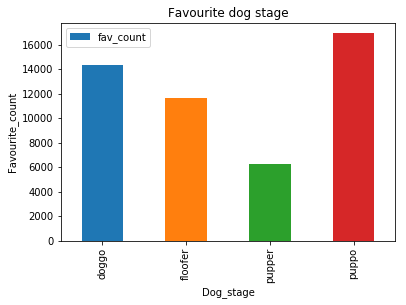

In [59]:
fig_df=twitter_df_clean_2[twitter_df_clean_2["Dog_stage"].notnull()].groupby(["Dog_stage"]).mean().reset_index()
fig_df.plot.bar(x="Dog_stage",y="fav_count");
plt.title("Favourite dog stage");
plt.xlabel("Dog_stage");
plt.ylabel("Favourite_count");

<h4>Which dog stage is rated highly out of 10?</h4>

In [60]:
twitter_df_clean_2[twitter_df_clean_2["Dog_stage"].notnull()].groupby(["Dog_stage"]).mean().reset_index().sort_values(by="rating_numerator",ascending=True).iloc[0:20,:]

,Dog_stage,tweet_id,rating_numerator,rating_denominator,retweet_count,fav_count,p1_conf
2,pupper,7.258615e+17,10.692623,10.0,2811.147541,6243.545082,0.586007
0,doggo,7.919375e+17,11.589041,10.0,6386.767123,14326.136986,0.549197
1,floofer,7.656406e+17,11.800000,10.0,4083.600000,11674.900000,0.466195
3,puppo,8.090628e+17,12.068966,10.0,6129.827586,16909.103448,0.698750


<h4>What is the engagement level over time?</h4>

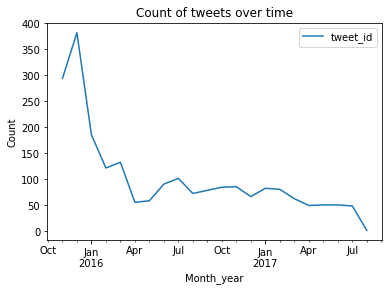

In [61]:
twitter_df_clean_2.groupby(["month_year"]).count().reset_index().sort_values(by=["month_year"]).plot.line(x="month_year",y="tweet_id");
plt.title("Count of tweets over time");
plt.xlabel("Month_year");
plt.ylabel("Count");

In [62]:
twitter_df_clean_2.groupby(["month_year"]).count().reset_index().sort_values(by=["tweet_id"],ascending=False)

,month_year,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stage,retweet_count,fav_count,p1,p1_conf
1,2015-12,382,382,382,373,382,382,382,66,382,382,233,233
0,2015-11,294,294,294,291,294,294,294,0,294,294,209,209
2,2016-01,186,186,186,181,186,186,186,45,186,186,105,105
4,2016-03,133,133,133,131,133,133,133,12,133,133,73,73
3,2016-02,122,122,122,120,122,122,122,23,122,122,77,77
8,2016-07,102,102,102,101,102,102,102,27,102,102,68,68
7,2016-06,91,91,91,89,91,91,91,19,91,91,47,47
12,2016-11,86,86,86,83,86,86,86,19,86,86,41,41
11,2016-10,85,85,85,83,85,85,85,12,85,85,45,45
14,2017-01,83,83,83,81,83,83,83,19,83,83,40,40


### Insights:
1. Tweets in Puppo stage have been favourited most in terms of tweets while pupper stage are at the bottom.

2. In terms of rating,dogs in Puppo stage have been the highest rated.

3. Based on data tweets data we have,the engagement levels decline over time . Need to look for strategies to boost engagement.Peak engagement was in the month of December 2015

### Visualization

<h4>Word cloud of the most common dog names<h4>

In [63]:
str_text=' '.join([x for x in list(twitter_df_clean_2["name"]) if x!='None'])
wcloud=WordCloud().generate(str_text)

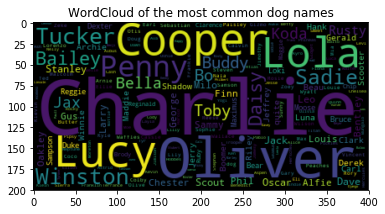

In [64]:
plt.title("WordCloud of the most common dog names")
plt.imshow(wcloud, interpolation='bilinear')
plt.show()

In [65]:
twitter_df_clean_2["name"].value_counts().sort_values(ascending=False)

None             690
Charlie           12
Cooper            11
Lucy              11
Oliver            11
Penny             10
Tucker            10
Lola              10
Winston            9
Sadie              8
Bailey             7
Bo                 7
Toby               7
Daisy              7
Buddy              7
Oscar              6
Scout              6
Koda               6
Leo                6
Dave               6
Jack               6
Bella              6
Jax                6
the                6
Milo               6
Stanley            6
Rusty              6
Louis              5
Phil               5
Sammy              5
                ... 
Meera              1
Dewey              1
Yoda               1
Gustaf             1
Emmie              1
western brown      1
Willy              1
Samsom             1
Katie              1
Lilli              1
Tater              1
Richie             1
Ace                1
Poppy              1
Godzilla           1
Barclay            1
Flurpson     

<h4>Word cloud of the most common dog breeds<h4>

In [66]:
str_text_2=' '.join([str(x) for x in twitter_df_clean_2["p1"] if str(x) not in ["nan","golden_retriever","Labrador_retriever"]])
wcloud_2=WordCloud().generate(str_text_2)

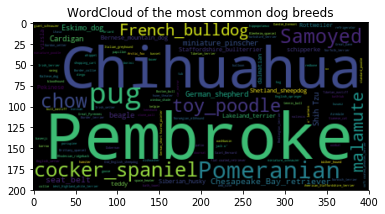

In [67]:
plt.title("WordCloud of the most common dog breeds")
plt.imshow(wcloud_2, interpolation='bilinear')
plt.show()

In [68]:
twitter_df_clean_2["p1"].value_counts().sort_values(ascending=False)

golden_retriever             98
Labrador_retriever           62
Pembroke                     61
Chihuahua                    48
pug                          40
Pomeranian                   25
cocker_spaniel               23
toy_poodle                   21
Samoyed                      21
chow                         21
malamute                     18
French_bulldog               17
Chesapeake_Bay_retriever     16
seat_belt                    15
beagle                       13
Cardigan                     13
miniature_pinscher           13
Shih-Tzu                     12
Eskimo_dog                   11
Shetland_sheepdog            11
Staffordshire_bullterrier    11
German_shepherd              11
teddy                        10
Rottweiler                   10
Siberian_husky               10
schipperke                    9
Lakeland_terrier              9
vizsla                        9
dalmatian                     9
Pekinese                      9
                             ..
pool_tab